In [1]:
import django
django.setup()

2020-02-04 16:45:28,302 [mandal.settings] INFO     Debugging build
2020-02-04 16:45:28,304 [mandal.settings] INFO     Hosting on ['*']


# Distributed Analysis

The Arnheim Framework bridges djangos ORM with cluster based analysis. A Representation inherits from the LarvikArray which in turn is a Proxy for xArray. All of the meta data is stored in this datafile so it is easily browsable.

In [2]:
from dask.distributed import Client, progress
c = Client()
c

/opt/conda/lib/python3.7/site-packages/distributed/client.py:1074: VersionMismatchWarning: Mismatched versions found

msgpack
+------------------------+---------+
|                        | version |
+------------------------+---------+
| client                 | 0.6.1   |
| scheduler              | 0.6.2   |
| tcp://172.18.0.4:43287 | 0.6.2   |
+------------------------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Client Scheduler: tcp://daskscheduler:8786 Dashboard: http://daskscheduler:8787/status,Cluster Workers: 1 Cores: 4 Memory: 4.66 GB


## Import

Representation is bergens binder of ImageStack where general x and y dimensions have not been altered to the original ImageStack, so 2D Rois are all perfectly aligned.

In [3]:
from bioconverter.models import Representation
from filters.filters import MaxISP, Prewitt, Mapping
import larvik.extenders

2020-02-04 16:45:33,339 [larvik.extenders] INFO     Making DataArrays Look Beautiful
2020-02-04 16:45:33,341 [larvik.extenders] INFO     Extending DataArray


In [4]:
reps = Representation.distributed.filter(sample__name__startswith="APV")
reps

<LarvikArrayQueryset [<Representation: Initial Stack>, <Representation: Max ISP of Initial Stack>, <Representation: Max ISP of Initial Stack>, <Representation: Prewitt of Max ISP of Initial Stack>]>

## Further Filtration on the Cluster

Further Analysis is then done on the Cluster (the LarvikBag call is a Proxy to Dask Bag, with _getarr_ matching, put provides more methods like parsing and setting storage

In [5]:
filtered = reps.asBag().filter(lambda x: "z" in x.dims)

In [6]:
parsed = filtered.parse(MaxISP, Prewitt)

In [9]:
parsed = parsed.take(1)[0]

## Evaluation
As long as no computation is called the array has not yet been altered. We can call this for each array individual or for the whole stack

In [11]:
parsed

<xarray.DataArray 'sqrt-39cb22ed3a746779cd75e7b9589b1fe3' (x: 1256, y: 1256, c: 2, t: 1)>
dask.array<sqrt, shape=(1256, 1256, 2, 1), dtype=float64, chunksize=(157, 314, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * c         (c) int64 0 1
    channels  (c) [('Index', '<i8'), ('Name', '<U250'), ('EmissionWavelength', '<f8'), ('ExcitationWavelength', '<f8'), ('IlluminationType', '<U250'), ('AcquisitionMode', '<U250'), ('Color', '<U250'), ('SamplesPerPixel', '<i8')] dask.array<chunksize=(2,), meta=np.ndarray>
    physt     (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    physx     (x) float64 dask.array<chunksize=(1256,), meta=np.ndarray>
    physy     (y) float64 dask.array<chunksize=(1256,), meta=np.ndarray>
  * t         (t) int64 0
  * x         (x) int64 0 1 2 3 4 5 6 7 ... 1249 1250 1251 1252 1253 1254 1255
  * y         (y) int64 0 1 2 3 4 5 6 7 ... 1249 1250 1251 1252 1253 1254 1255

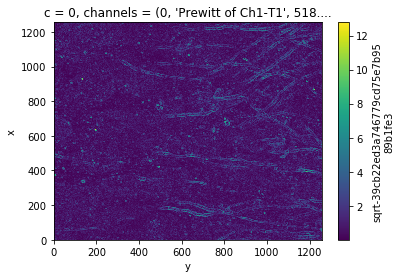

In [12]:
parsed.sel(c=0,t=0).plot.imshow()